In [1]:
! pip install ipywidgets


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
import seaborn as sns
from ipywidgets import widgets
from  PIL import Image
import os

### Creacion de algortimo de modificacion de imagens mediante el uso del logaritmo
***
Haciendo uso de uso del logaritmo podemos trasladarnos entre escenarios muti-dimesnionales siendo capaces de hacer cosas como transmutacion de imagens o vectores tal que:


* `a = log(63) / log(2)`
* `b = log(2)/ log(63)`

donde `a` es la inversa de `b` lo que en una grafica de evidencia asi:

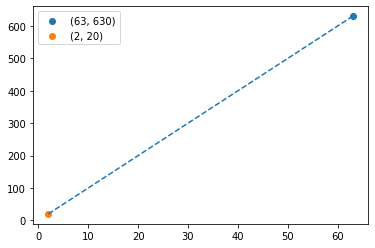

In [3]:
#funcion
f=lambda x: x*10

#variable independiente
x1=63
x2=2
#variable dependiente
y1=f(x1)
y2=f(x2)
#grafica
plt.scatter(x=x1,y=y1)
plt.scatter(x=x2,y=y2)
plt.legend(labels=[(x1,y1),(x2,y2)])
plt.plot([x2,x1],[y2,y1],'--')



#### Ahora fingiremos que queremos saber la posicion de `x2` basandonos en su resultado
***
para ello usaremos el logaritmo que nos permitira con base a un punto elevarlo de tal manera que nos llevara hasta el punto deseado 

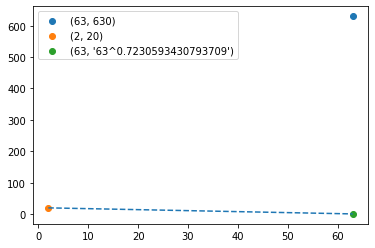

In [4]:
ylog= log(y2)/log(63)
#ahora si remplazamos 
plt.scatter(x=[x1],y=[y1])
plt.scatter(x=[x2],y=[y2])
plt.scatter(x=[x1],y=[ylog])
plt.plot([x2,x1],[y2,ylog],'--')
plt.legend(labels=[(x1,y1),(x2,y2),(x1,f'{x1}^{ylog}')])


### Uso del logartimo para elementos en `3d`
***
ahora haremos lo mismo basandonos en una grafica de 3 dimensiones

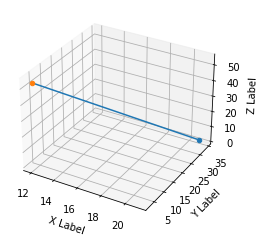

In [5]:
#puntos
vec1 = (21,34,2)
vec2=(12,3,53)
#Grafico 3d
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=vec1[0],ys=vec1[1],zs=vec1[2])
ax.scatter(xs=vec2[0],ys=vec2[1],zs=vec2[2])
ax.plot3D(xs=[vec2[0],vec1[0]],ys=[vec2[1],vec1[1]],zs=[vec2[2],vec1[2]])

#ejes name
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

**Ahora a travez del uso del logartimo hayaremos  el exponente `vec2` con respecto a cada punto del `vec1`**
***

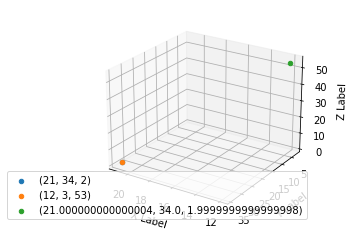

In [6]:
#Hayar exponente
veclog = tuple(map(lambda x,y:log(x)/log(y),vec1,vec2))
#Vector resultante
vec_res = tuple(map(lambda x,y:x**y,vec2,veclog))
#Grafico 3d
def cam(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.view_init(x, y)
    return ax
while True:
    try:
        wid_Y = int(input('ejes y: '))
        wid_X = int(input('ejes x: '))
    except:break

    ax = cam(wid_X,wid_Y)
    ax.scatter(xs=vec1[0],ys=vec1[1],zs=vec1[2])
    ax.scatter(xs=vec_res[0],ys=vec_res[1],zs=vec_res[2])
    ax.scatter(xs=vec2[0],ys=vec2[1],zs=vec2[2])
    ax.plot3D(xs=[vec1[0],vec_res[0]],ys=[vec1[1],vec_res[1]],zs=[vec1[2],vec_res[2]])
    plt.legend(labels=[vec1,vec2,vec_res],loc=4)
    #ejes name
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    

### Uso del logaritmo para elemento `multidimensionales`
***
ahora con lo visto procederemos a aplicarle trasmformacion mediante el `log`artimo a una `matriz` o imagen (a blanco y negro)

In [7]:
prueba= np.array(Image.open('imagenes\joven.jpg'))
prueba[:,2,:]

array([[255, 246, 237],
       [255, 246, 237],
       [255, 246, 237],
       ...,
       [254, 253, 251],
       [254, 253, 251],
       [254, 253, 251]], dtype=uint8)

Text(0.5, 1.0, 'imagen de un joven')

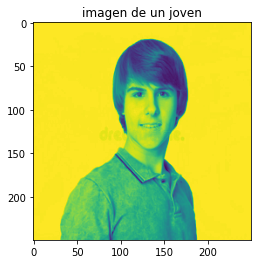

In [8]:
joven= np.array(Image.open('imagenes\joven.jpg').resize((250,250)))
joven = joven[:,:,0]
plt.imshow(joven)
plt.title('imagen de un joven')

Text(0.5, 1.0, 'imagen de un abuelo')

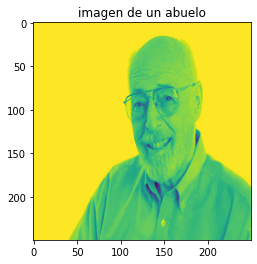

In [9]:
viejo= np.array(Image.open('imagenes/abuelos.jpg').resize((250,250)))
viejo = viejo[:,:,0]
plt.imshow(viejo)
plt.title('imagen de un abuelo')

In [10]:
print(f'{joven.shape}<->{viejo.shape}={joven.shape == viejo.shape}')

(250, 250)<->(250, 250)=True


#### hora a plicar el algortimo
****
ahora procederemos a transformar la imagen del `joven` en la `vieja` atravez del logartimo

In [11]:
viejo.astype('float')

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 179., 196., 203.],
       [255., 255., 255., ..., 185., 199., 204.],
       [255., 255., 255., ..., 191., 201., 203.]])

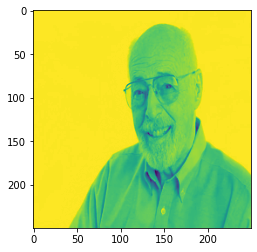

In [23]:
def transmutador(matriz_obj,matriz_ini,logaritmo=False):# matriz_obj: matriz ibjetivo ; matriz_ini: matriz inicial
    try:
        resultado =np.empty_like(matriz_ini)
    except:
        resultado =np.empty_like(matriz_ini[0])
    for y in range(len(matriz_ini)):
        for x in range(len(matriz_ini[y])):
            if matriz_ini[y][x] == 1:
                matriz_ini[y][x] = 1.1
            if logaritmo == False:#extraccion de una imagen nueva
                resultado[y][x]= matriz_ini[y][x]**(log(matriz_obj[y][x])/log(matriz_ini[y][x]))
            else:#extraccion de los exponentes
                resultado[y][x]= float(log(matriz_obj[y][x])/log(matriz_ini[y][x]))

    return resultado

plt.imshow(transmutador(matriz_obj=viejo,matriz_ini=joven))

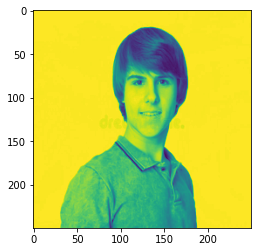

In [13]:
plt.imshow(transmutador(matriz_obj=joven,matriz_ini=viejo))


* **Diferencia entre la imagen original del `joven` y las transmutada con base en el `viejo`**

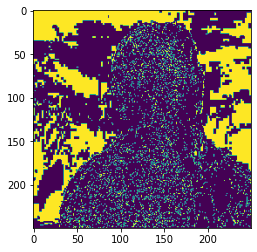

In [14]:
plt.imshow(transmutador(matriz_obj=joven,matriz_ini=viejo) == joven)

* **Diferencia entre la imagen original del `viejo` y las transmutada con base en el `joven`**

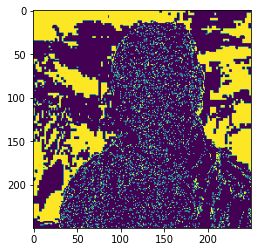

In [15]:
plt.imshow(transmutador(matriz_obj=viejo,matriz_ini=joven) == viejo)


#### Exponentes resultantes
*** 

* **Exponente del `viejo` con base del `joven`**

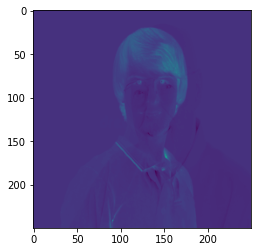

In [16]:
exponentes_1 = transmutador(matriz_obj=viejo,matriz_ini=joven,logaritmo=True)
plt.imshow(exponentes_1)

* **Exponente del `joven` con base del `viejo`**

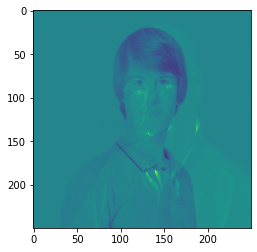

In [17]:
exponentes_2 = transmutador(matriz_obj=joven,matriz_ini=viejo,logaritmo=True)
plt.imshow(exponentes_2)

### Exponiendo utilidades de usar el logartimo en creacion de algortimos
****
Gracias a que el logartimo nos permite movernos a nivel multidimensional, podemos usarlo para analisar como hacer un cambio de divisa con una acertividad cerca al `99%`

**metodo actual para cambio de divisas**

'''

 1 usd = 4.500cop `#esto es una ejemplificacion`

 entonces:

 700 usd = x cop `->` 700usd /cop = x `->` (700 * 4500)cop /cop =x 

 3'150.000 = x
 
'''

* Comparacion de las dos divisas

Text(0.5, 0, 'Z Label')

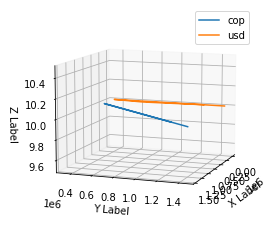

In [18]:
#Ejemplos de divisas 
cop =[1450000,340000,650000,1245000]
usd = [4000,5000,67000,3400]

def cam2(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    return ax

ax = cam(10,20)
ax.plot(cop,cop,10)
ax.plot(usd,cop,10)
plt.legend(labels=['cop','usd'])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

* **Comparacion bidimencional**

Text(0.5, 1.0, 'Comparacion de divisas')

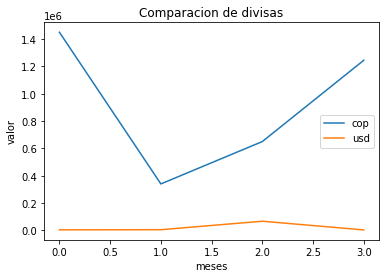

In [19]:
plt.plot(cop)
plt.plot(usd)
plt.legend(labels=['cop','usd'])
plt.xlabel('meses')
plt.ylabel('valor')
plt.title('Comparacion de divisas')

* Evaluando la nueva divisa con respecto a los pesos colombianos

Text(0.5, 0, 'Z Label')

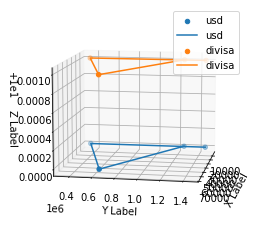

In [24]:
#divisas
divisa = transmutador([usd],[cop])
#Grafica
ax = cam(10,10)
ax.scatter(usd,cop,10)
ax.plot3D(usd,cop,10)
ax.scatter(divisa[0],cop,10.001)
ax.plot3D(divisa[0],cop,10.001)
plt.legend(labels=['usd','usd','divisa','divisa'],loc=1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

Text(0.5, 0, 'Z Label')

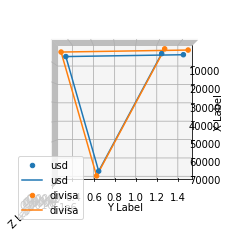

In [25]:
ax = cam(90,0)
ax.scatter(usd,cop,10)
ax.plot3D(usd,cop,10)
ax.scatter(divisa[0],cop,10.001)
ax.plot3D(divisa[0],cop,10.001)
plt.legend(labels=['usd','usd','divisa','divisa'])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [26]:
print(cop,usd)

[1450000, 340000, 650000, 1245000] [4000, 5000, 67000, 3400]


In [28]:
transmutador([usd],[cop])

array([[ 4000,  5000, 67000,  3399]])